In [1]:
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()




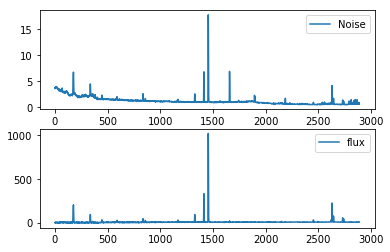

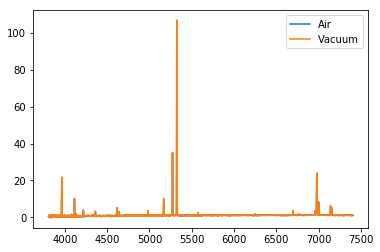

wdisp 2891 lam_gal 2891


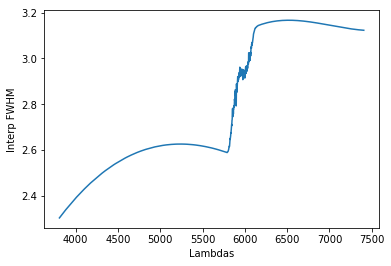

velscale 69.1451441267


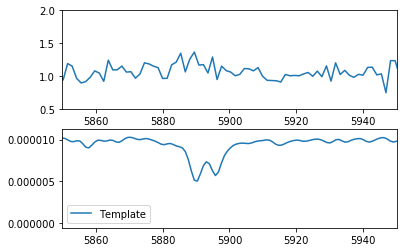

input vel 18526.0


TypeError: 'module' object is not callable

In [31]:
y=ppxf_example_kinematics_sdss()
def gauss_1(x,*p):
    A, mu, sigma, slope, height=p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))+slope*x+height

lams=y[0]
gals=y[1]
err=y[2]
print(err)

In [6]:
#air wavelengths
#5889.95
#5895.92

#vac
#5891.58
#5897.55

plt.clf()

cut_lams = lams[2160:2180]
cut_gals = gals[2160:2180]


p0=[-1,6263,1,0.01,1]
coeff, var_matrix=curve_fit(gauss_1, cut_lams, cut_gals, p0=p0)
print(coeff)

v_stars_c=abs((coeff[1]-5889.95)/5889.95)#air or vac?

z_stars=np.exp( v_stars_c)-1
print('z_stars', z_stars)

plt.annotate(z_stars,xy=(0.7,0.9),xycoords='axes fraction', color='black') 
        
# Get the fitted curve
hist_fit = gauss_1(cut_lams, *coeff)
plt.plot(cut_lams, hist_fit, color='black')

p0=[-0.5,6271,1,0.01,1]
coeff, var_matrix=curve_fit(gauss_1, cut_lams, cut_gals, p0=p0)

v_stars_c=abs((coeff[1]-5895.92)/5895.92)#air or vac?

z_stars=np.exp( v_stars_c)-1
print('z_stars', z_stars)

plt.annotate(z_stars,xy=(0.7,0.8),xycoords='axes fraction', color='orange') 

plt.annotate('pPXF Fit ='+str(0.0637454081958), xy=(0.7,0.7), xycoords='axes fraction', color='red')

z = 0.06335
zErr = 8.018E-4

plt.annotate('SDSS ='+str(z)+'$\pm$'+str(zErr), xy=(0.7,0.6), xycoords='axes fraction', color='black')


# Get the fitted curve
hist_fit = gauss_1(cut_lams, *coeff)
plt.plot(cut_lams, hist_fit, color='orange')

plt.plot(cut_lams, cut_gals)

print('hist fit', hist_fit)
#plt.axvline(x=6269.426532)
#plt.axvline(x=6263.0783325)
#plt.xlim([6220,6300])
#plt.ylim([0.5,1.5])
plt.tight_layout()
savefig('../comparison_NaD.pdf')
z=0.06335
c=2.99792458e5
red_vel=c*np.log(1 + z)



print(( 18526    -red_vel))
#18453 = sdss
#18240 = PA 1
#18404 = PA 2
#18162 = PA 3

'''So the redshift should be given by:
z_stars=exp(all.VEL_STARS/ckm)-1.d0'''
z_stars=np.exp( 18526     /c)-1
print('z_stars from sol', z_stars)

'''what is the error here? on the redshift'''
z = 0.06335
zErr = 8.018E-4

p_err=(zErr/z)
v_err=p_err*18526  
print('this could be your error',v_err)

#5890 is a Na D absorption line
#D1 Na 589.592
#D2	Na	588.995
delta_l_1 = 5895.92*z
print(delta_l_1 + 5895.92)

delta_l_2 = 5889.95*z
print(delta_l_2 + 5889.95)

[ -1.46359310e-01   6.26502190e+03   1.91219880e+00   4.63104607e-03
  -2.80226958e+01]
z_stars 0.0657512822621
z_stars 0.0655731502562
hist fit [ 0.91359711  0.9242897   0.93501663  0.94572067  0.9564476   0.96711349
  0.96619034  0.87807846  0.96733856  1.00977325  1.02076721  1.03151321
  1.04223633  1.05298996  1.06371689  1.07444382  1.08520126  1.09593582
  1.1067009   1.11744308]
111.457526383
z_stars from sol 0.0637454081958
this could be your error 234.477455406
6269.426532
6263.0783325


tight_layout : falling back to Agg renderer


In [10]:



from __future__ import print_function

from astropy.io import fits
from scipy import ndimage
import numpy as np
from time import clock
import glob
from os import path

from ppxf import ppxf
import ppxf_util as util


def ppxf_example_kinematics_sdss():

    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    file = '../spec-1777-53857-0076.fits'
    hdu = fits.open(file)
   
    t = hdu['COADD'].data
    z = 0.0637454081958   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(3540)) & (t['loglam'] < np.log10(7409))
    flux = t['flux'][mask]
    var = 1/np.sqrt(t['ivar'][mask])
    var_scaled=var/np.median(flux)
    fig=plt.figure()
    ax1=fig.add_subplot(2,1,1)
    ax1.plot(var, label='Noise')
    plt.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.plot(flux, label='flux')
    plt.legend()
    plt.show()
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam'][mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    
    plt.plot(lam_gal, galaxy, label='Air')
    plt.plot(lam_gal_vac, galaxy, label='Vacuum')
    plt.legend()
    plt.show()
    
    noise = np.full_like(galaxy, 0.0166)       # Assume constant noise per pixel here
    noise = var_scaled

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    plt.plot(lam_gal, fwhm_gal)
    plt.xlabel('Lambdas')
    plt.ylabel('Interp FWHM')
    plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    fig=plt.figure()
    ax1=fig.add_subplot(211)
    ax1.plot(lam_gal, galaxy, label='Gal')
    ax1.set_xlim([5850,5950])
    ax1.set_ylim([0.5,2.0])
    ax2=fig.add_subplot(212)
    ax2.plot(lam_temp, ssp, label='Template')
    ax2.set_xlim([5850,5950])
    plt.legend()
    plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    print('input vel', vel)
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=4, vsyst=dv, clean=True, lam=lam_gal)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    plt.ylim([-1,7])
    plt.show()
    return lam_gal, galaxy, pp.error[0]




In [9]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <rawcell>

# This program is written to automate the 1 and 2 gaussian fitting of the rotating disk galaxies - used for two, but could definitely be used for all galaxies. 
# It also produces a W_80 velocity dispersion measurement - if large probably an outflow. 
# Not necessarily to be trusted for two gaussians.
# Still trying to figure out the problem of error on the velocity measurements - it's looking like just taking the squre root of that element of the variance matrix (np.sqrt(var_matrix[1,1])) is much too small. I'm thinking we'll have to do something with the standard deviation here.

# <codecell>


import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare

##Some super extended examples:

def linefit(x, *p):
    a,  b = p
    return a*x+b


####~~~~~~~~~~~~Okay the crazy galaxy J1354#####

J1354_PA0_red, J1354_PA0_NII, J1354_PA0_SII_6720, J1354_PA0_SII_6730, J1354_PA0_OI = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA0_tranz_h.fits')
J1354_PA0_red_ivar, J1354_PA0_NII_ivar, J1354_PA0_SII_6720_ivar, J1354_PA0_SII_6730_ivar, J1354_PA0_OI_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA0_ivar_tranz_h.fits')

J1354_PA45_red, J1354_PA45_NII, J1354_PA45_SII_6720, J1354_PA45_SII_6730, J1354_PA45_OI =pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/bJ1354_PA45_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/bJ1354_PA45_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/bJ1354_PA45_tranz_h.fits'), pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/bJ1354_PA45_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/bJ1354_PA45_tranz_h.fits')
J1354_PA45_red_ivar, J1354_PA45_NII_ivar, J1354_PA45_SII_6720_ivar, J1354_PA45_SII_6730_ivar, J1354_PA45_OI_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/red/J1354_PA45_ivar_tranz_h.fits')

J1354_PA153_red, J1354_PA153_NII, J1354_PA153_SII_6720, J1354_PA153_SII_6730, J1354_PA153_OI = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/bJ1354_PA153_tranz_h.fits')
J1354_PA153_red_ivar, J1354_PA153_NII_ivar, J1354_PA153_SII_6720_ivar, J1354_PA153_SII_6730_ivar, J1354_PA153_OI_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA153_ivar_tranz_h.fits'), pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/red/J1354_PA153_ivar_tranz_h.fits')
#After cutting[300:500]
J1354_PA0, J1354_PA0_h_beta, J1354_PA0_OIII_4363, J1354_PA0_OII, J1354_PA0_HeII = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_tranz_h.fits')
J1354_PA0_ivar, J1354_PA0_h_beta_ivar, J1354_PA0_OIII_4363_ivar, J1354_PA0_OII_ivar, J1354_PA0_HeII_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA0_ivar_tranz_h.fits')

J1354_PA45, J1354_PA45_h_beta, J1354_PA45_OIII_4363, J1354_PA45_OII, J1354_PA45_HeII =pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_h.fits'), pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_h.fits'), pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_h.fits')
J1354_PA45_ivar, J1354_PA45_h_beta_ivar,J1354_PA45_OIII_4363_ivar, J1354_PA45_OII_ivar, J1354_PA45_HeII_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_ivar_tranz_h.fits'), pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/J1354_PA45_ivar_tranz_h.fits')

J1354_PA153, J1354_PA153_h_beta, J1354_PA153_OIII_4363, J1354_PA153_OII, J1354_PA153_HeII = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_tranz_h.fits')
J1354_PA153_ivar, J1354_PA153_h_beta_ivar, J1354_PA153_OIII_4363_ivar, J1354_PA153_OII_ivar, J1354_PA153_HeII_ivar = pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_ivar_tranz_h.fits'),pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/J1354_PA153_ivar_tranz_h.fits')



In [10]:
redshift_J1354 = 0.0633581002031

redshift_J1354_e = 5.63444982043e-05
print(redshift_J1354, redshift_J1354_e)

0.0633581002031 5.63444982043e-05


In [44]:
gal=J1354_PA45
gal_ivar=J1354_PA45_ivar

lab_lambda=5006.84

CRVAL3=gal[0].header['CRVAL1']
CDELT3=gal[0].header['CD1_1']

xs=np.linspace(0,shape(gal[0].data)[1]-1,shape(gal[0].data)[1])

lambdas=[CRVAL3+CDELT3*x for x in xs]
print(shape(gal[0].data)[1])



min_spatial=50#was 260
max_spatial=90


      

plt.clf()

twod=np.flipud(gal[0].data)
twod_ivar=np.flipud(gal_ivar[0].data)
print(len(lambdas))

plt.imshow(twod[min_spatial:max_spatial,1225:1245])
plt.show()

plt.plot(np.sum(twod[min_spatial:max_spatial,1225:1245],axis=1))


p0=[9000,20,5,0,10]
x_1=np.linspace(0,39,40)

coeff,var_matrix=curve_fit(gauss_1, x_1, np.sum(twod[min_spatial:max_spatial,1225:1245],axis=1), p0=p0)

hist_fit=gauss_1(x_1,*coeff)
plt.plot(x_1,hist_fit)
plt.show()

print(coeff[1])





1991
1991
19.9983568354


In [107]:

plt.plot(lambdas,twod[70])
plt.show()


chis=[]
vels=[]
vel_e=[]

rows=np.linspace(60,79,20)
#rows=np.linspace(70,70,1)

for i in xrange(len(rows)):
    y=ppxf_longslit(rows[i],'no')
    print(y[3])
    chis.append(y[2])
    vels.append(y[3])
    vel_e.append(y[4])

shape temp (5457, 156)
shape gal (1991,)
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     18526       200     0.000     0.000
chi2/DOF: 0.0815
Function evaluations: 11 Status: 1
Nonzero Templates:  1  /  156
Formal errors:
     dV    dsigma   dh3      dh4
 2.5e+02 2.9e+02    0.89    0.89
Elapsed time in PPXF: 0.72 s
18526.0
shape temp (5457, 156)
shape gal (1991,)
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     18526       200     0.000     0.000
chi2/DOF: 0.08068
Function evaluations: 12 Status: 1
Nonzero Templates:  1  /  156
Formal errors:
     dV    dsigma   dh3      dh4
   1e+02 1.3e+02    0.35    0.35
Elapsed time in PPXF: 0.78 s
18526.0
shape temp (5457, 156)
shape gal (1991,)
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     18526       200     0.000     0.000
chi2/DOF: 0.08096
Function evaluations: 11 Status: 1
Nonzero Templates:  2  /  156
Formal errors:
     dV    dsigma   dh3      dh4
 1.8e+02 1.9e+02    0.55    0.55
Elapsed time

In [108]:
plt.plot(rows, chis)
plt.show()
plt.scatter(rows,vels)
plt.errorbar(rows, vels, yerr=vel_e, linestyle='None')
plt.axhline(y=18527, color='red')
plt.show()

In [102]:
def ppxf_longslit(row,plot):
    
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
 
    z = 0.0637454081958   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    
    flux = twod[row]
    var = 1/np.sqrt(twod_ivar[row])
    var_scaled=var/np.median(flux)
    
    galaxy = np.array(flux/np.median(flux))  # Normalize spectrum to avoid numerical issues
    lam_gal = np.array(lambdas)
    
    if plot=='yes':
        plt.plot(lam_gal,flux)
        plt.plot(lam_gal, var_scaled)
        plt.show()
    
    
    noise = np.full_like(galaxy, 0.0166)       # Assume constant noise per pixel here
    noise = var_scaled

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    #wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    #print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    #fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    fwhm_gal=[0.62 for x in lam_gal]
    
    x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal_alt=[lam_gal[x+1]-lam_gal[x] for x in x_1]
    fwhm_gal_alt.append(fwhm_gal[len(x_1)-1])
    

    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal, label='Instrumental')
        plt.plot(lam_gal, fwhm_gal_alt, label='Janky')
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.legend()
        plt.show()
        
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    #print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        #ax1.set_xlim([5850,5950])
        #ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        #ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)
    #print('goodpixels',goodpixels)
    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    #print('input vel', vel)
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()
    if plot=='yes':
        plt.plot(templates)
        plt.plot(galaxy)
        plt.plot(noise)
        plt.show()
    plt.clf()
    
    
    print('shape temp', shape(templates))
    print('shape gal', shape(galaxy))
    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=4, vsyst=dv, clean=True, lam=lam_gal)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    if plot=='yes':
        plt.ylim([-1,7])
        plt.show()
    return lam_gal, galaxy,pp.chi2,pp.sol[0], pp.error[0]


In [ ]:
'''now a section for the integrated specs at each PA'''



CRVAL1 and CDELT1 4552.85205078125 0.617957472801209


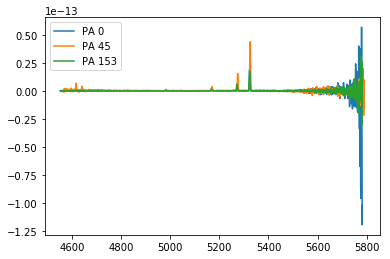

In [2]:
lab_lambda=5006.84
redshift_J1354=0.0633581002031
c=2.99792458e5
vel_stars=np.log(redshift_J1354+1.)*c

test_0=pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/cJ1354_PA0_tranz_h.ms.fits')#cJ1354_PA0_cut_tranz_air.ms.fits')
test_153=pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night1_redo/blue/cJ1354_PA153_tranz_h.ms.fits')#cJ1354_PA153_cut_tranz_air.ms.fits')
test_45=pyfits.open('../APO_Observing/recalibrate/fitcoords_practice/J1354_recal/night2_redo/blue/cJ1354_PA45_h.ms.fits')#cJ1354_PA45_cut_tranz_air.ms.fits')

V_HELIO=25.4

PA1=test_0[0].data[0][0]
#PA0=PA0[0][0]
#print(shape(PA0))
PA1_head=test_0[0].header
CRVAL1=PA1_head['CRVAL1']
CDELT1=PA1_head['CD1_1']
CDELT1_0=CDELT1
print('CRVAL1 and CDELT1', CRVAL1, CDELT1)

xs_0=np.linspace(0,len(PA1)-1,len(PA1))
xs_0_plot=[x*CDELT1+CRVAL1-redshift_J1354*lab_lambda-(V_HELIO*lab_lambda)/c for x in xs_0]
xs_0_plot_PA_1=xs_0_plot
xs_0=[x*CDELT1 + CRVAL1-(V_HELIO*lab_lambda)/c for x in xs_0]

plt.plot(xs_0, PA1, label='PA 0')



#PA 45:
V_HELIO=-25.98
PA45=test_45[0].data[0][0]
PA45_head=test_45[0].header
CRVAL1=PA45_head['CRVAL1']
CDELT1=PA45_head['CD1_1']
CDELT1_45=CDELT1
xs_45=np.linspace(0,len(PA45)-1,len(PA45))
#xs_0_plot=[x*CDELT1+CRVAL1-redshift_J1354*lab_lambda-(V_HELIO*lab_lambda)/c for x in xs_0]
#xs_0_plot_PA_1=xs_0_plot
xs_45=[x*CDELT1 + CRVAL1-(V_HELIO*lab_lambda)/c for x in xs_45]

plt.plot(xs_45, PA45, label='PA 45')


V_HELIO=25.4

PA153=test_153[0].data[0][0]
#PA0=PA0[0][0]
#print(shape(PA0))
PA153_head=test_153[0].header
CRVAL1=PA153_head['CRVAL1']
CDELT1=PA153_head['CD1_1']
CDELT1_153=CDELT1


xs_153=np.linspace(0,len(PA153)-1,len(PA153))

xs_153=[x*CDELT1 + CRVAL1-(V_HELIO*lab_lambda)/c for x in xs_153]

plt.plot(xs_153, PA153, label='PA 153')

plt.legend()
plt.show()

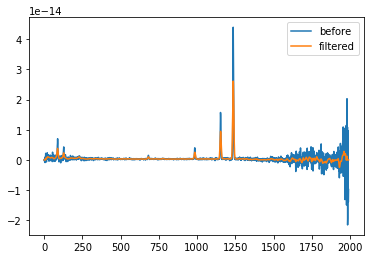

noise [ 0.0166  0.0166  0.0166 ...,  0.0166  0.0166  0.0166]


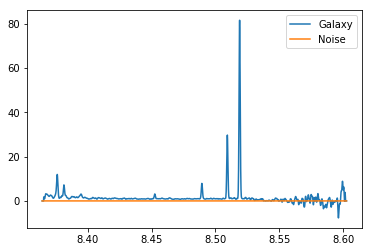

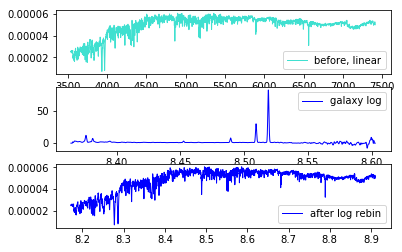

input vel 18400.4455391
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     17752         5     0.088    -0.081
chi2/DOF: 1.031e+05
Function evaluations: 50 Status: 1
Nonzero Templates:  1  /  1
Templates weights:
  3.33e+04
Formal errors:
     dV    dsigma   dh3      dh4
 1.9e+04 1.9e+05 1.1e+05 1.2e+05
Elapsed time in PPXF: 0.84 s


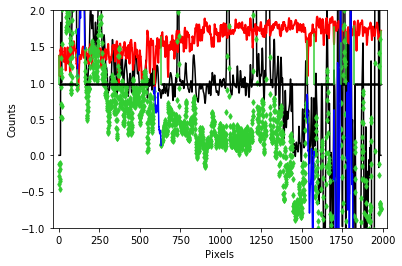

(array([ 4290.64284129,  4291.22362165,  4291.80440201, ...,  5445.23419729,
         5445.81497765,  5446.39575801]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 58.545117604408659,
 17752.02387495845,
 0.12626264793373587)

In [73]:
ppxf_int_PAs_J1354(xs_45,PA45,'yes',1,0.0633,0,0.1)

In [72]:
'''now were going to do it for the integrated longslit stuff'''
noise=0
def ppxf_int_PAs_J1354(xs,spec,plot, velscale_ratio, input_z, z, error_percent ):
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    xs=np.array(xs)
    
    #mask = (xs > 3540) & (xs < 7409)
    mask = (xs > 4440) & (xs < 6000)
    gal_lin=np.array(spec[mask])
    new_xs=xs[mask]
    
    lam_gal=np.array(new_xs)
    
    
    
    
    '''x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal=[lam_gal[x+1]-lam_gal[x] for x in x_1]
    fwhm_gal.append(fwhm_gal[len(x_1)-1])
    fwhm_gal=np.array(fwhm_gal)'''
    
    
    
    
    lam_gal = lam_gal/(1+input_z) 
    #fwhm_gal = fwhm_gal/(1+input_z)
    
    
    lamRange1=[lam_gal[0],lam_gal[-1]]
    
    fwhm_gal=np.array([3 for x in lam_gal])
    
    gal_filtered = util.gaussian_filter1d(gal_lin,fwhm_gal)
    if plot=='yes':
        plt.plot(gal_lin, label='before')
        plt.plot(gal_filtered, label='filtered')
        plt.legend()
        plt.show()
    
    #velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    galaxy, logLam1, velscale = util.log_rebin(lamRange1, gal_filtered)
    galaxy = galaxy/np.median(galaxy)
    noise = np.full_like(galaxy, 0.0166)#np.array(abs(galaxy*error_percent))
    print('noise',noise)
    if plot=='yes':
        plt.clf()
        plt.plot(logLam1, galaxy, label='Galaxy')
        plt.plot(logLam1, noise, label='Noise')
        plt.legend()
        plt.show()
    '''looks like we also need to degrade our galaxy'''
    


    
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

 
    hdu = fits.open(vazdekis[10])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [lam_temp[0], lam_temp[-1]]
    
    sspNew_1,logLam2, velscale_temp = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(3,1,1)
        ax1.plot(lam_temp,ssp, label='before, linear', lw=1, color='turquoise')
        plt.legend()
        ax2=fig.add_subplot(3,1,2)
        ax2.plot(logLam1, galaxy,label='galaxy log', lw=1, color='blue')
        plt.legend()
        ax3=fig.add_subplot(3,1,3)
        ax3.plot(logLam2, sspNew_1,label='after log rebin', lw=1, color='blue')
        plt.legend()
        plt.show()
    
    templates = np.empty((sspNew_1.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    #fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt(fwhm_gal**2 - fwhm_tem**2)
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels
 
    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        #ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
  
   
    
    goodpixels = util.determine_goodpixels(logLam1, lamRange_temp, input_z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + input_z)   # Initial estimate of the galaxy velocity in km/s
    #vel=0
    if plot=='yes':
        print('input vel', vel)
    start = [vel, 100.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()
    
 


    pp = ppxf(sspNew_1, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=-1, vsyst=dv, velscale_ratio=velscale_ratio,
              clean=False)#was degree=12
    if plot=='yes':
        print("Formal errors:")
        print("     dV    dsigma   dh3      dh4")
        print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

        print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    plt.ylim([-1,2])
    
    #plt.xlim([4000,6000])
    plt.show()
    if input_z ==0:
        red_alt=0
    else:
        red_alt=(input_z+1)*(1 +pp.sol[0]/c)-1
    plt.clf()
    return lam_gal, galaxy, pp.error[0], pp.sol[0], red_alt
